In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%config InlineBackend.figure_format='retina'

In [2]:
def count_k_arm(k = 10, timesteps = 1000, runs = 2000, epsilon = 0.01):
    
    q_star = np.random.normal(0, 1, (runs, k)) 
    q_optimal = np.argmax(q_star, axis=1)

    Q = np.zeros((runs, k))
    R = []
    optimal_total = []
    N = np.ones((runs, k))

    for timestep in tqdm(range(timesteps)):
        R_t = []
        optimal_t = 0
        for problem in range(runs):
            
            if Q[problem].sum() == 0 or np.random.random(1) < epsilon:
                A_t = np.random.randint(k)
            else:
                A_t = np.argmax(Q[problem])
                
            if A_t == q_optimal[problem]: optimal_t += 1

            R_current = np.random.normal(q_star[problem, A_t], 1)
            R_t.append(R_current)
            N[problem, A_t] += 1
            Q[problem, A_t] = Q[problem, A_t] + (R_current - Q[problem, A_t])/N[problem, A_t]

        R.append(np.mean(R_t))
        optimal_total.append(optimal_t*100/runs)
        
    return R, optimal_total

In [3]:
R0001, O0001 = count_k_arm(epsilon=0.001)
R001, O001 = count_k_arm(epsilon=0.01)
R01, O01 = count_k_arm(epsilon=0.1)
R025, O025 = count_k_arm(epsilon=0.25)
R05, O05 = count_k_arm(epsilon=0.5)
R1, O1 = count_k_arm(epsilon=1)
R0, O0 = count_k_arm(epsilon=0)

100%|██████████| 1000/1000 [00:27<00:00, 37.03it/s]


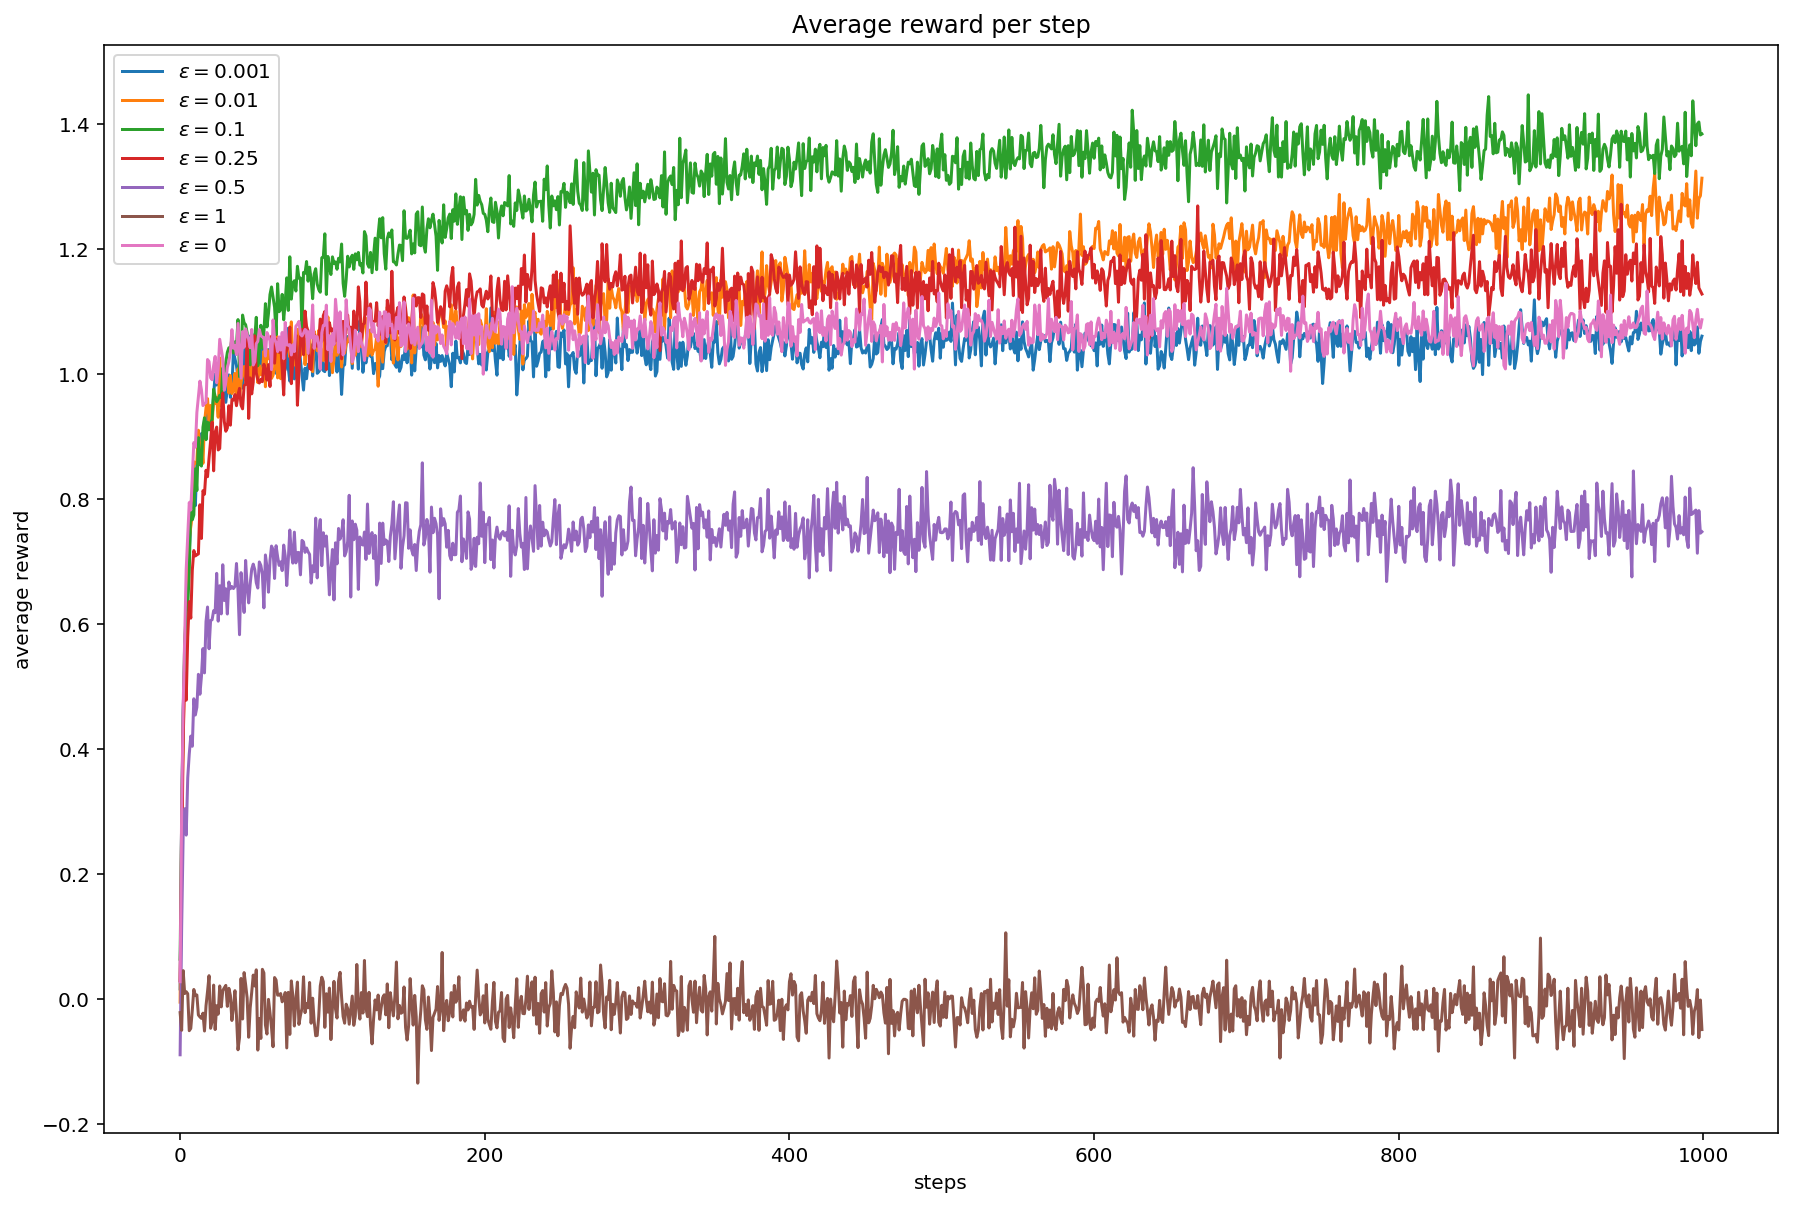

In [4]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(R0001, label="$\epsilon = 0.001$")
ax.plot(R001, label="$\epsilon = 0.01$")
ax.plot(R01, label="$\epsilon = 0.1$")
ax.plot(R025, label="$\epsilon = 0.25$")
ax.plot(R05, label="$\epsilon = 0.5$")
ax.plot(R1, label="$\epsilon = 1$")
ax.plot(R0, label="$\epsilon = 0$")
plt.xlabel("steps")
plt.ylabel("average reward")
plt.title("Average reward per step")
plt.legend()
plt.show()

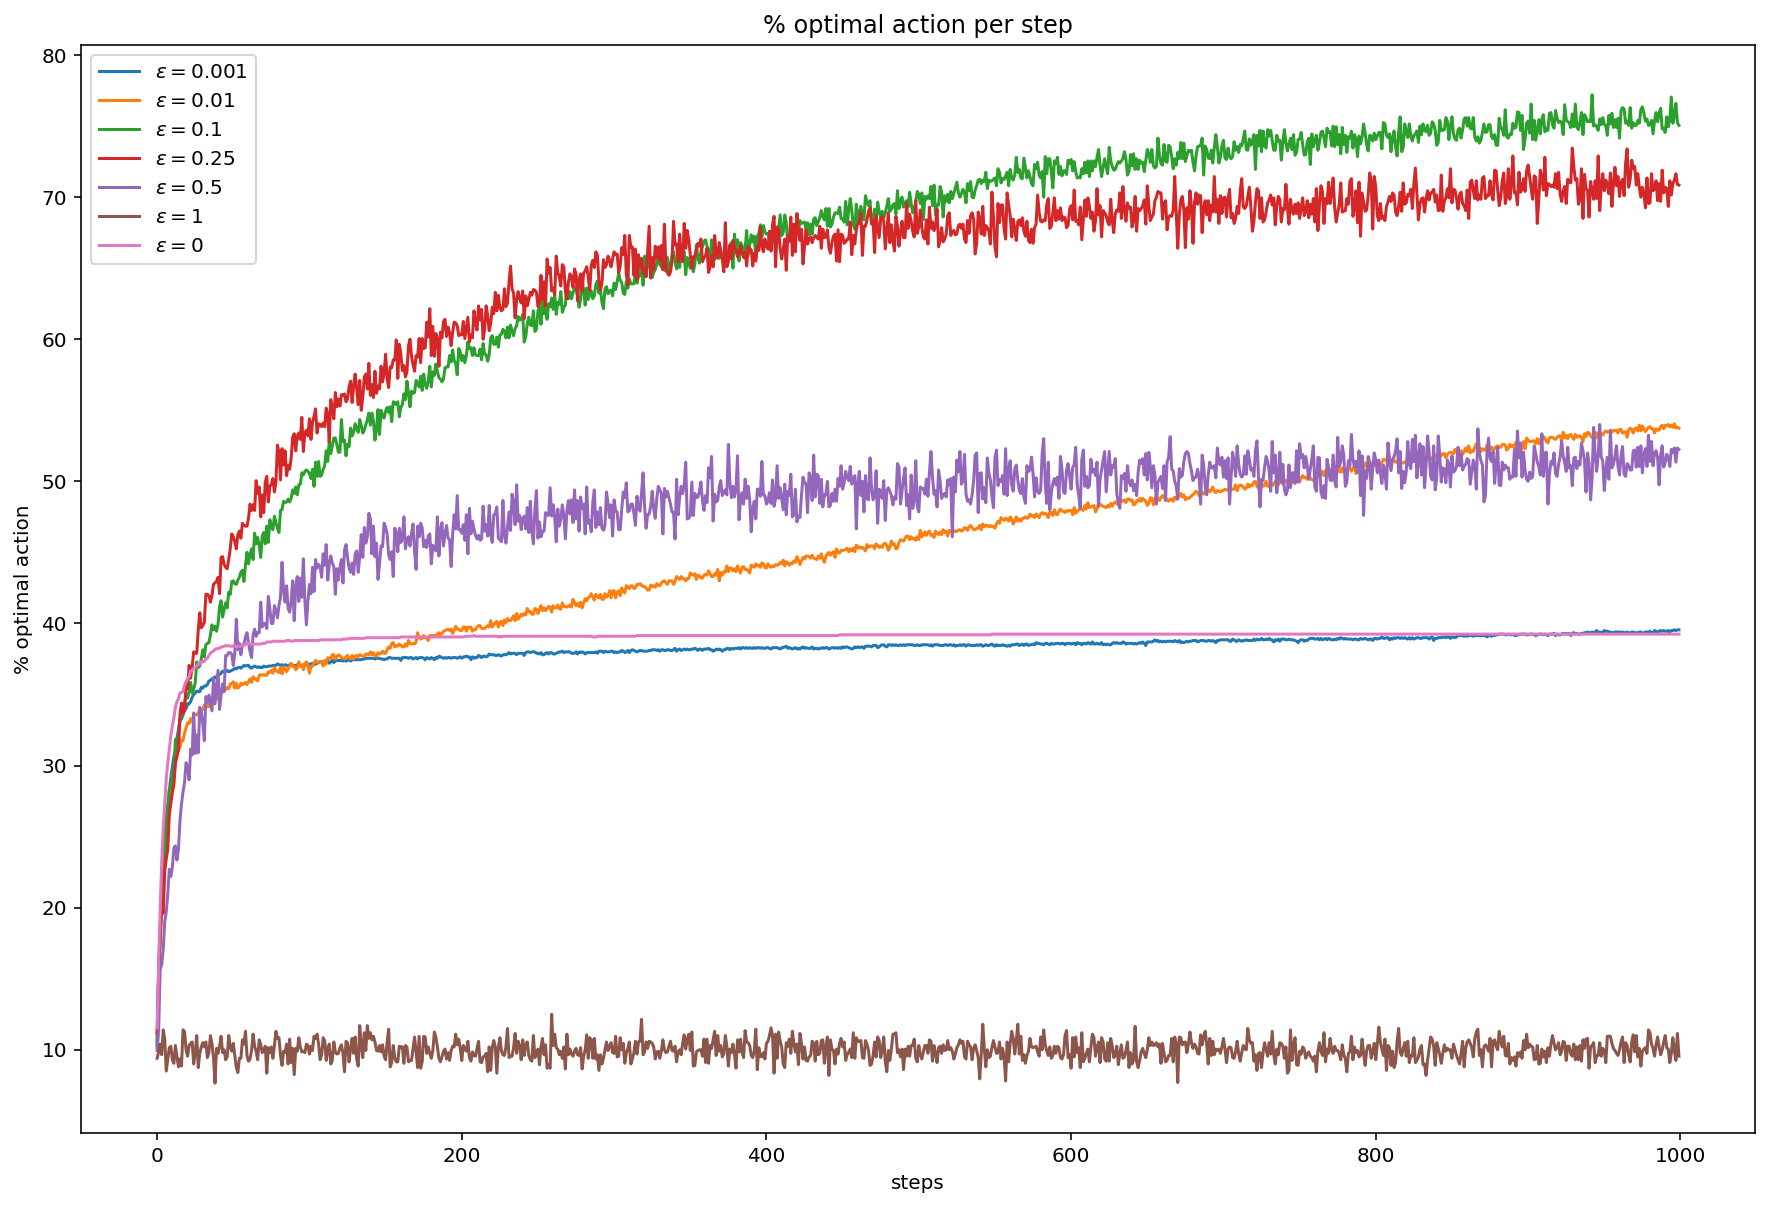

In [5]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.plot(O0001, label="$\epsilon = 0.001$")
ax.plot(O001, label="$\epsilon = 0.01$")
ax.plot(O01, label="$\epsilon = 0.1$")
ax.plot(O025, label="$\epsilon = 0.25$")
ax.plot(O05, label="$\epsilon = 0.5$")
ax.plot(O1, label="$\epsilon = 1$")
ax.plot(O0, label="$\epsilon = 0$")
plt.xlabel("steps")
plt.ylabel("% optimal action")
plt.title("% optimal action per step")
plt.legend()
plt.show()